Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **3. studenog 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h != None: 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [4]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [5]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Accuracy score = 1.0


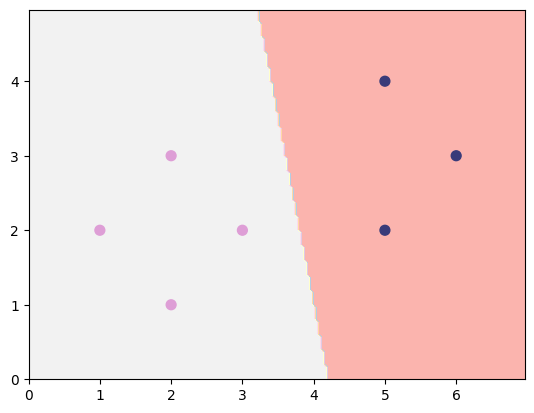

In [6]:
model = RidgeClassifier(alpha = 0)
model.fit(seven_X, seven_y)
prediction = model.predict(seven_X)

print(f"Accuracy score = {accuracy_score(seven_y, prediction)}")

plot_2d_clf_problem(seven_X, seven_y, h = model.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

LinearRegression()

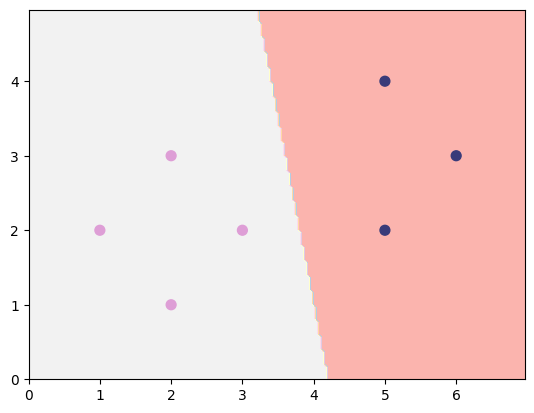

In [7]:
model_reg = LinearRegression()
model_reg.fit(seven_X, seven_y)
h_lambda = lambda x : model_reg.predict(x) >= 0.5
plot_2d_clf_problem(seven_X, seven_y, h = h_lambda)

seven_y_2 = np.array([1, 1, 1, 1, -1, -1, -1])
model_reg.fit(seven_X, seven_y_2)
#plot_2d_clf_problem(seven_X, seven_y_2, h = h_lambda)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [8]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

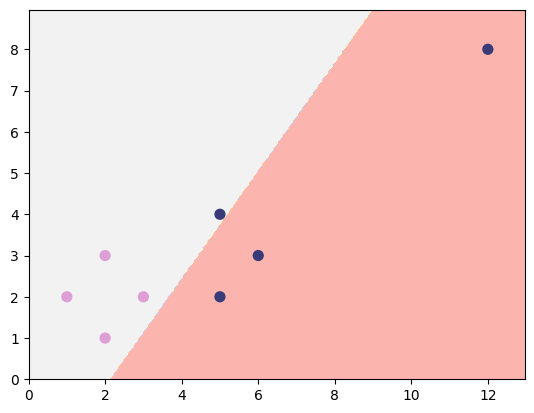

In [9]:
model_reg.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, h = h_lambda)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [10]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

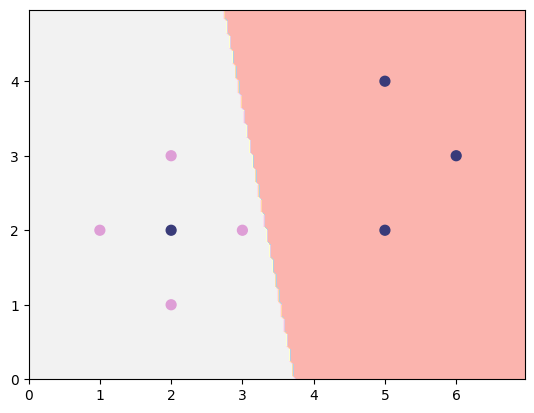

In [11]:
model_reg.fit(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y, h = h_lambda)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

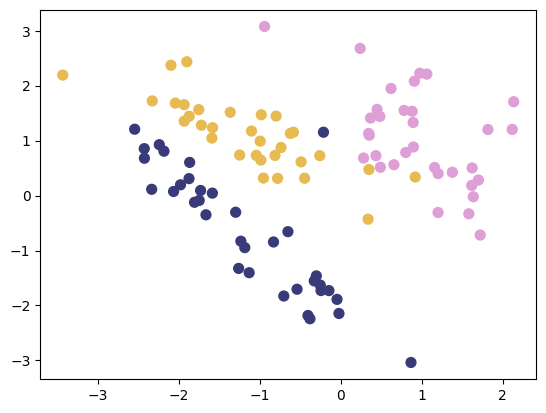

In [12]:
from sklearn.datasets import make_classification

X, y = make_classification(n_classes = 3, n_redundant = 0, n_features = 2, n_clusters_per_class = 1)

plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

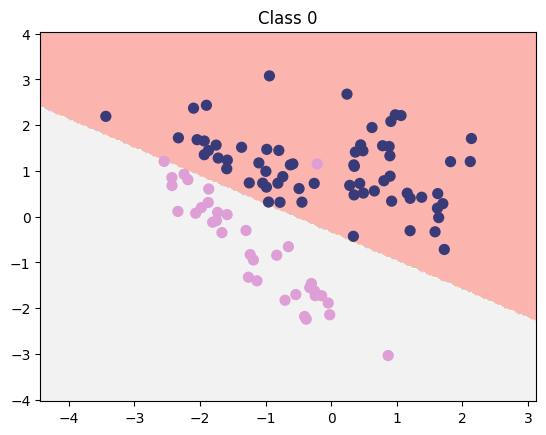

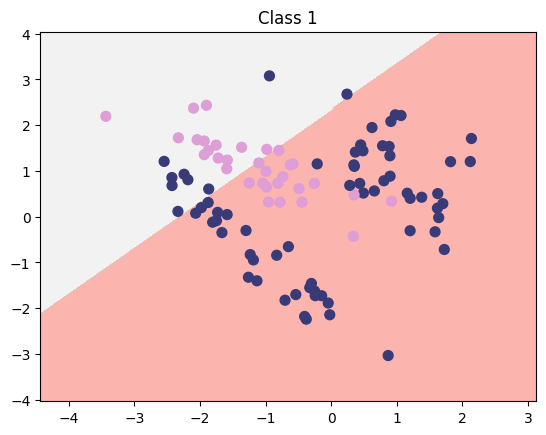

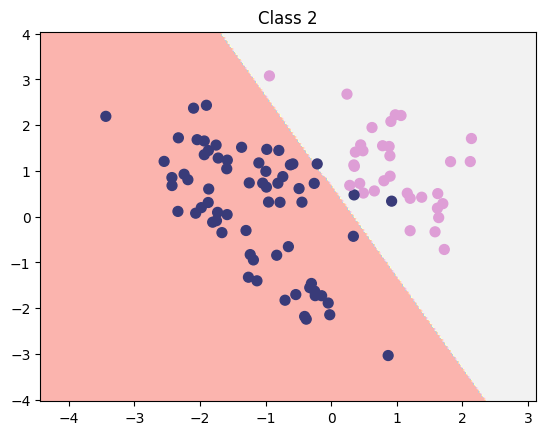

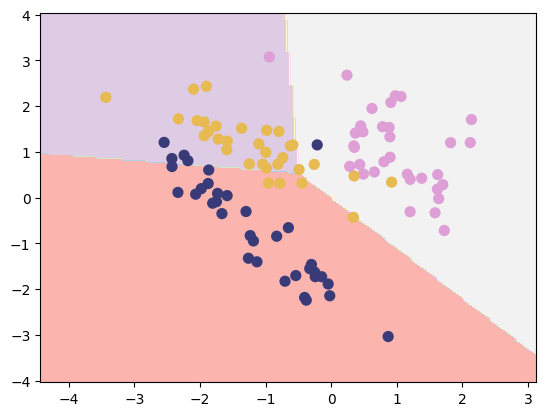

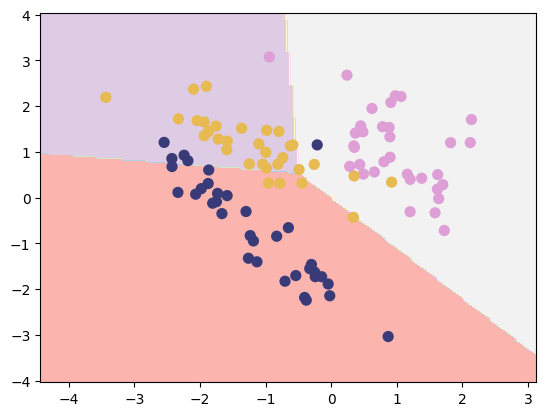

In [13]:
yyy = {}
yyy[0] = 1 - np.where(y != 0, 1, y) 
yyy[1] = np.where(y != 1, 0, y)
yyy[2]= np.where(y != 2, 0, y) / 2

models_ridge = {}
models_linreg = {}
predictions = {}
for i in range(3):
    models_ridge[i] = RidgeClassifier(alpha=0).fit(X, yyy[i])
    models_linreg[i] = LinearRegression().fit(X, yyy[i])
    plt.figure(i)
    plt.title(f"Class {i}")
    plot_2d_clf_problem(X, yyy[i], h = models_ridge[i].predict)

def predict(x, models): 
    predictions = {}
    for i in range(3):
        predictions[i] = models[i].predict(x)
    prediction = np.zeros(len(predictions[0]))
    for idx in range(len(predictions[0])):
        prediction.put(idx, np.argmax((predictions[0][idx], predictions[1][idx], predictions[2][idx])))
    return prediction

plot_idx = len(yyy)
plt.figure(plot_idx)
plot_2d_clf_problem(X, y, h = lambda x : predict(x, models_linreg))

plt.figure(plot_idx + 1)
m = RidgeClassifier(alpha=0).fit(X, y)
plot_2d_clf_problem(X, y, h = m.predict)







### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

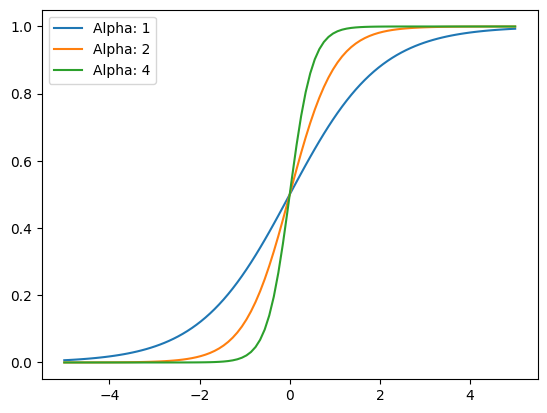

In [14]:
def sigm(x, alpha = 1):
    return 1 / (1 + np.e ** (-alpha * x))

alphas = np.array([1 , 2 , 4])

input = np.linspace(-5, 5, 100)

for a in alphas:
    output = sigm(input, a)
    plt.plot(input, output, label = f"Alpha: {a}")

plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [15]:
from numpy import linalg

def lr_h(x, w):
    return sigm(np.dot(w, x))

def cross_entropy_error(X, y, w):
    cross_entropy_error_ = 0
    threshold = 1e-14
    for idx in range(len(y)):
        h_x = np.clip(lr_h(X[idx], w), threshold, 1 - threshold)
        cross_entropy_loss = -y[idx] * np.log(h_x) - (1 - y[idx]) * np.log(1 - h_x)
        cross_entropy_error_ += cross_entropy_loss
    cross_entropy_error_ /= len(y)
    return cross_entropy_error_

reshape_X = lambda X : np.hstack((np.ones(len(X)).reshape(-1,1), X))
stack_w = lambda w0, w : np.hstack((w0, w)) 

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False, useStochastic=False):
    curr_iter = 0
    w = np.zeros(len(X[0]))
    w0 = 0
    ws = {}
    dcee = float("inf")
    if(not useStochastic):
        while(curr_iter < max_iter and abs(dcee) > epsilon):
            cee = cross_entropy_error(reshape_X(X), y, stack_w(w0,w))
            dw = np.zeros(len(X[0]))
            dw0 = 0
            for idx in range(len(y)):
                h_x = lr_h(np.hstack((1, X[idx])), stack_w(w0,w))
                dw -= (h_x - y[idx]) * X[idx]
                dw0 -= (h_x - y[idx])
            w0 += eta * dw0
            w = w * (1 - eta * alpha) + eta * dw
            ws[curr_iter] = stack_w(w0,w)
            curr_iter += 1
            cee_new = cross_entropy_error(reshape_X(X), y, stack_w(w0,w))
            dcee = cee - cee_new
        if(not trace):
            return stack_w(w0,w), max_iter - curr_iter, dcee, cee_new
        else:
            return ws
    else:
        dw = np.zeros(len(X[0]))
        dw0 = 0
        cee_new = float("inf")
        while(curr_iter < max_iter and abs(dcee) > epsilon and cee_new > epsilon):
            permutation = np.random.permutation(len(y))
            X = X[permutation]
            y = y[permutation]
            #print(f"Iter {curr_iter}")
            #[print(f"{X[idx]}, {y[idx]}") for idx in range(len(y))]
            for idx in range(len(y)):
                cee = cross_entropy_error(reshape_X(X), y, stack_w(w0,w))
                h_x = lr_h(np.hstack((1, X[idx])), stack_w(w0,w))
                dw -= (h_x - y[idx]) * X[idx]
                dw0 -= (h_x - y[idx])
                w0 += eta * dw0
                w = w * (1 - eta * alpha) + eta * dw
            cee_new = cross_entropy_error(reshape_X(X), y, stack_w(w0,w))
            dcee = cee - cee_new
            curr_iter += 1
        return stack_w(w0,w), max_iter - curr_iter, dcee, cee_new

    

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [16]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Cross entropy error: 0.13521872720206746
Iterations left: 1053
CEE diff: 9.993140689895652e-05


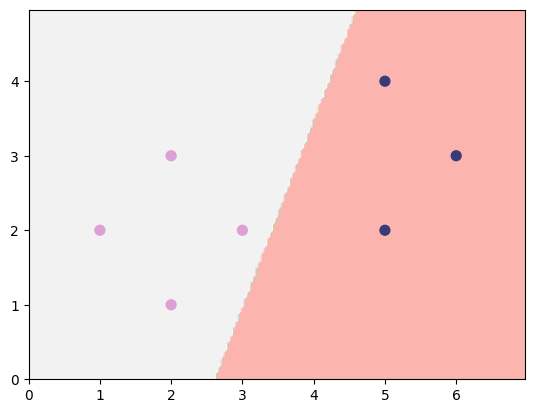

In [17]:
w, iter, dcee, cee = lr_train(seven_X, seven_y, useStochastic=False, max_iter=2000, epsilon=1e-4, eta=0.01)

def lr_predict(X, w):
    return sigm(reshape_X(X) @ w)

print(f"Cross entropy error: {cee}")
print(f"Iterations left: {iter}")
print(f"CEE diff: {dcee}")
plot_2d_clf_problem(seven_X, seven_y, h = lambda x : lr_predict(x, w) > 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [18]:
from sklearn.metrics import zero_one_loss

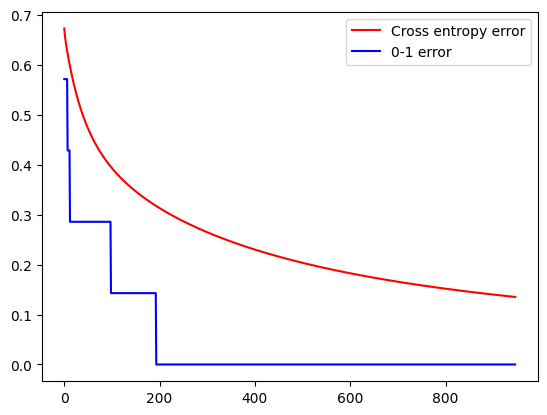

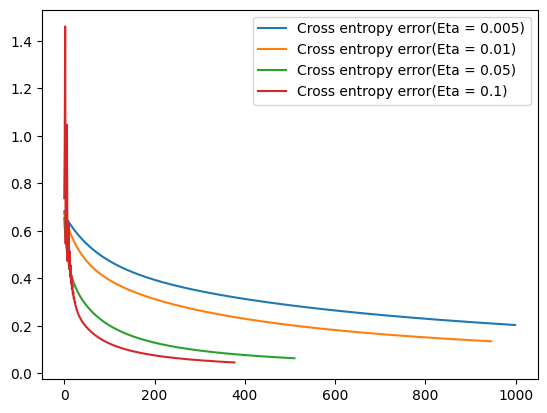

In [19]:
ws = lr_train(seven_X, seven_y, trace=True, max_iter=1000)

def o1_error(X, y, w):
    return np.sum(((X @ w) * y) < 0) / len(y)

cee = np.zeros(len(ws))
o1error = np.zeros(len(ws))

for idx in ws:
    cee[idx] = cross_entropy_error(reshape_X(seven_X), seven_y, ws[idx])
    o1error[idx] = o1_error(reshape_X(seven_X), seven_y, ws[idx])

plt.figure(1)
plt.plot(np.arange(len(ws)), cee, c = "r", label = "Cross entropy error")
plt.plot(np.arange(len(ws)), o1error, c = "b", label = "0-1 error")
plt.legend()

plt.figure(2)
etas = [0.005, 0.01, 0.05, 0.1]
for eta in etas:
    ws = lr_train(seven_X, seven_y, trace=True, max_iter=1000, eta=eta)
    cee = np.zeros(len(ws))
    for idx in ws:
        cee[idx] = cross_entropy_error(reshape_X(seven_X), seven_y, ws[idx])
    plt.plot(np.arange(len(ws)), cee, label = f"Cross entropy error(Eta = {eta})")
plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

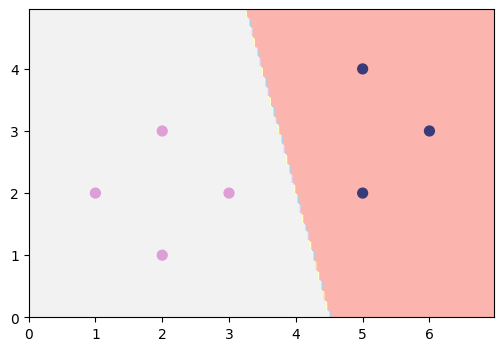

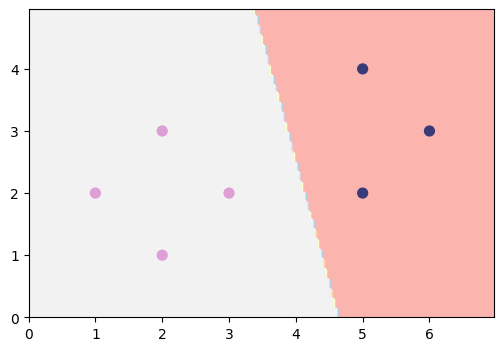

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(seven_X, seven_y)
plt.figure(1, figsize=(6,4))
plot_2d_clf_problem(seven_X, seven_y, h = model.predict)

w, iter, dcee, cee = lr_train(seven_X, seven_y, useStochastic=True, max_iter=100, epsilon=1e-4, eta=0.1, alpha=10)
plt.figure(2, figsize=(6,4))
plot_2d_clf_problem(seven_X, seven_y, h = lambda x : lr_predict(x, w) > 0.5)


### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [21]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

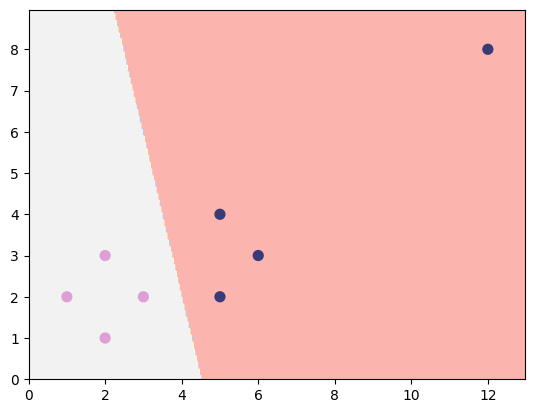

In [22]:
model = LogisticRegression().fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, h = model.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

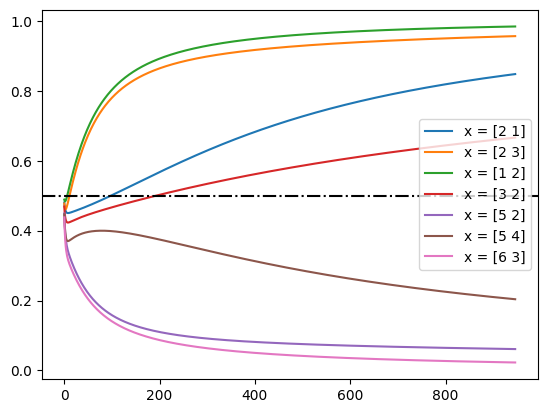

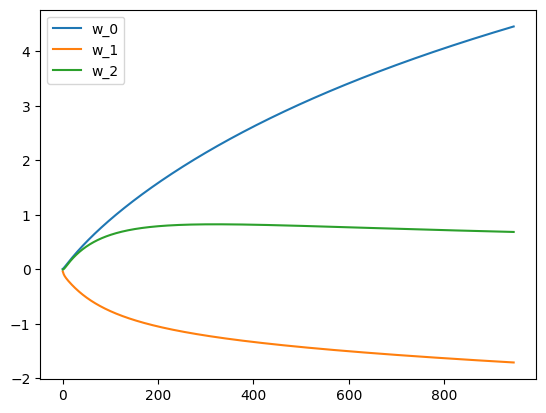

In [23]:
ws = lr_train(seven_X, seven_y, useStochastic=False, max_iter=1000, epsilon=1e-4, eta=0.01, alpha=0, trace=True)
plt.figure(1)
for example in seven_X:
    predictions = np.zeros(len(ws))
    for idx in range(len(ws)):
        predictions[idx] = lr_h(np.hstack((1, example)), ws[idx])
    plt.plot(np.arange(len(ws)), predictions, label = f"x = {example}")
plt.axhline(y = 0.5, color = "black", linestyle = "-.")
plt.legend()

plt.figure(2)
w = np.zeros((3, len(ws)))
for idx in range(len(ws)):
    for i in range(3):
        w[i][idx] = ws[idx][i]
[plt.plot(np.arange(len(ws)), w[i], label = f"w_{i}") for i in range(3)]
plt.legend()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [24]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

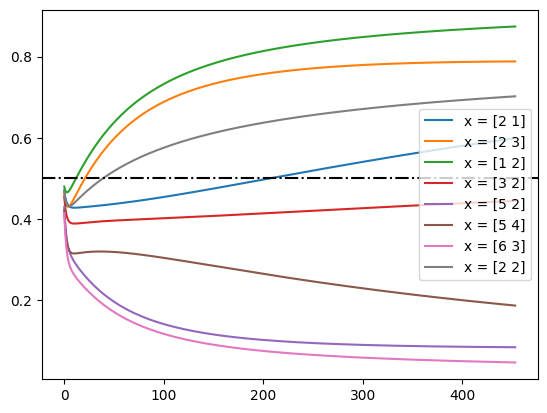

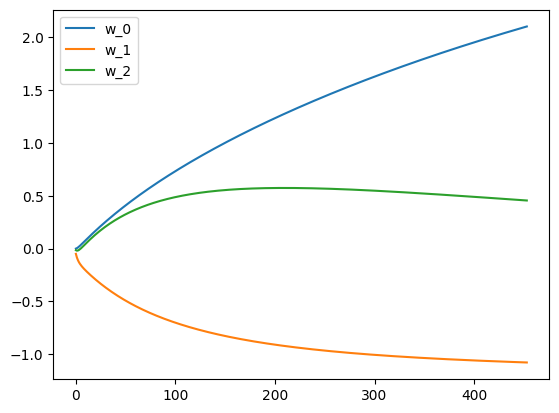

In [25]:
ws = lr_train(unsep_X, unsep_y, useStochastic=False, max_iter=1000, epsilon=1e-4, eta=0.01, alpha=0, trace=True)
plt.figure(1)
for example in unsep_X:
    predictions = np.zeros(len(ws))
    for idx in range(len(ws)):
        predictions[idx] = lr_h(np.hstack((1, example)), ws[idx])
    plt.plot(np.arange(len(ws)), predictions, label = f"x = {example}")
plt.axhline(y = 0.5, color = "black", linestyle = "-.")
plt.legend()

plt.figure(2)
w = np.zeros((3, len(ws)))
for idx in range(len(ws)):
    for i in range(3):
        w[i][idx] = ws[idx][i]
[plt.plot(np.arange(len(ws)), w[i], label = f"w_{i}") for i in range(3)]
plt.legend()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [26]:
from numpy.linalg import norm

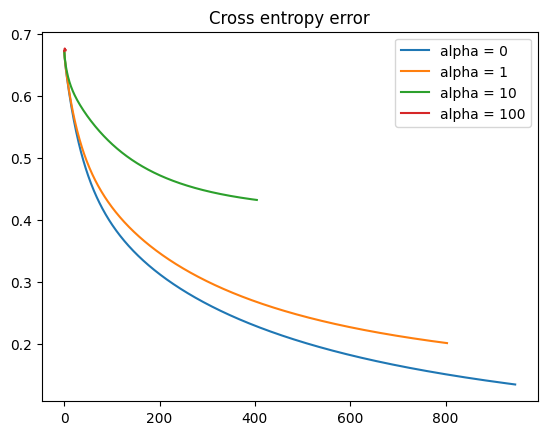

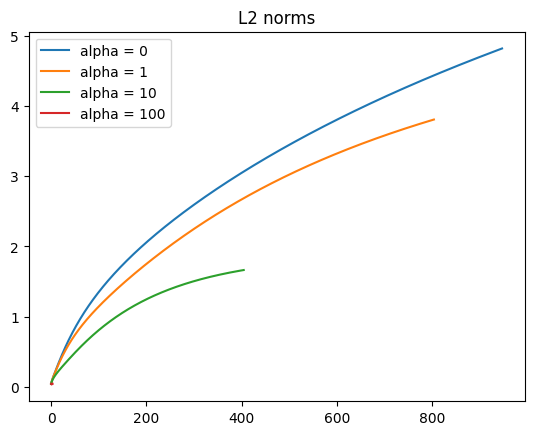

In [27]:
alphas = [0, 1, 10, 100]

def l2norm(coef):
    return np.sqrt(np.sum(coef ** 2))

plt.figure(1)
plt.title("Cross entropy error")
plt.figure(2)
plt.title("L2 norms")
for alpha in alphas:
    ws = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    error = np.zeros(len(ws))
    l2_norms = np.zeros(len(ws))
    for idx in range(len(ws)):
        error[idx] = cross_entropy_error(reshape_X(seven_X), seven_y, ws[idx])
        l2_norms[idx] = l2norm(ws[idx])
    plt.figure(1)
    plt.plot(np.arange(len(ws)), error, label = f"alpha = {alpha}")
    plt.figure(2)
    plt.plot(np.arange(len(ws)), l2_norms, label = f"alpha = {alpha}")
    #plt.figure(alpha + 3)
    #plt.title(f"Alpha = {alpha}")
    #plot_2d_clf_problem(seven_X, seven_y, h = lambda x : lr_predict(x, ws[len(ws) - 1]) > 0.5)
plt.figure(1)
plt.legend()
plt.figure(2)
plt.legend()

    

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [28]:
from sklearn.preprocessing import PolynomialFeatures

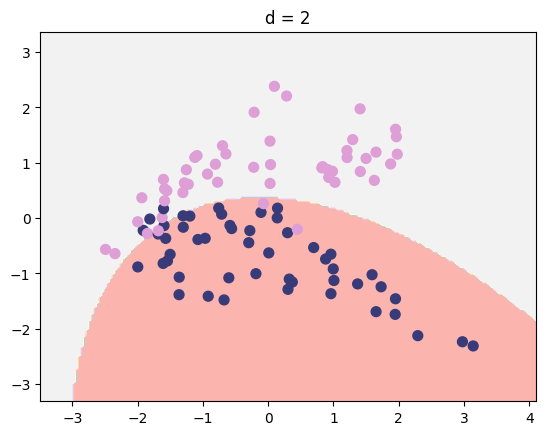

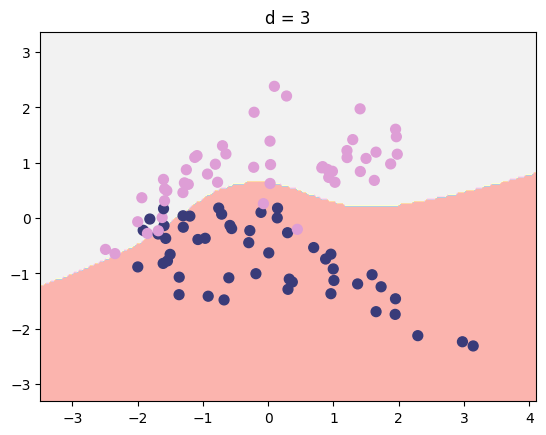

In [29]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_clusters_per_class=2, n_redundant=0, random_state=None)

for i in range(2):
    poly = PolynomialFeatures(i+2, include_bias=False).fit(X, y)
    model = LogisticRegression(C = 0.1).fit(poly.transform(X), y)
    plt.figure(i)
    plt.title(f"d = {i+2}")
    plot_2d_clf_problem(X, y, h = lambda x : model.predict(poly.transform(x)))



**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?